In [1]:
import pandas as pd

data = pd.read_csv('combined_since_2010.csv')
data.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,POff_W,Year
0,1,Phoenix Suns,82,240.6,40.7,82.8,0.492,8.9,21.6,0.412,...,31.9,43.0,23.3,5.8,5.1,14.8,20.9,110.2,10,2010
1,2,Golden State Warriors,82,240.6,40.6,86.5,0.469,7.7,20.6,0.375,...,29.2,38.4,22.4,9.3,4.1,14.7,23.0,108.8,0,2010
2,3,Denver Nuggets,82,241.2,38.1,81.4,0.468,6.6,18.5,0.359,...,30.5,41.4,21.0,8.3,5.1,13.9,22.5,106.5,2,2010
3,4,Utah Jazz,82,240.9,39.4,80.2,0.491,5.4,14.7,0.364,...,31.6,42.2,26.7,8.2,4.9,15.2,22.7,104.2,4,2010
4,5,Toronto Raptors,82,241.2,39.0,80.9,0.482,6.3,17.0,0.371,...,30.6,40.4,22.0,5.7,4.7,13.4,22.2,104.1,0,2010


Compare a few different methods for binary classification for which teams win at least one playoff game. We'll use two different stats to make the prediction and vary the prediction threshold to generate the ROC curves. First, points scored as our predictor

In [2]:
min_pts = min(data["PTS"])
max_pts = max(data["PTS"])
seq = [min_pts + k*(max_pts-min_pts)/99 for k in range(100)]
tp_pts = [0 for i in range(100)]
fp_pts = [0 for i in range(100)]
total_pos = sum([1 for wins in data["POff_W"] if wins >=1])
total_neg = len(data)-total_pos
for k in range(100):
    #each thing in "sub" is predicted to be a team winning a playoff game
    sub = data[data["PTS"]>=seq[k]]
    npts = len(sub)
    tp_count = sum([1 for wins in sub["POff_W"] if wins >=1])
    fp_count = npts-tp_count
    tp_pts[k]=tp_count/total_pos
    fp_pts[k]=fp_count/total_neg

Text(0, 0.5, 'True Positive Rate')

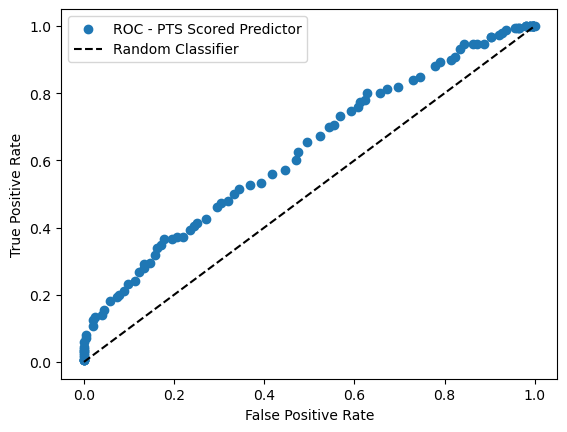

In [7]:
from matplotlib import pyplot as plt

plt.scatter(fp_pts,tp_pts)
basic_seq = [0 +k/99 for k in range(100)]
plt.plot(basic_seq,basic_seq,'k--')
plt.legend(['ROC - PTS Scored Predictor','Random Classifier'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Now lets look at points allowed and see how it compares

Text(0, 0.5, 'True Positive Rate')

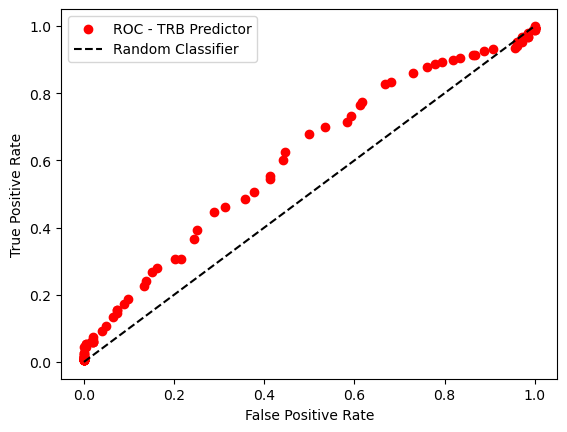

In [8]:
min_trb = min(data["TRB"])
max_trb = max(data["TRB"])
seq2 = [min_trb + k*(max_trb-min_trb)/99 for k in range(100)]
tp_trb = [0 for i in range(100)]
fp_trb = [0 for i in range(100)]
for k in range(100):
    #each thing in "sub" is predicted to be a team winning a playoff game
    sub = data[data["TRB"]>=seq2[k]]
    npts = len(sub)
    tp_count = sum([1 for wins in sub["POff_W"] if wins >=1])
    fp_count = npts-tp_count
    tp_trb[k]=tp_count/total_pos
    fp_trb[k]=fp_count/total_neg

plt.scatter(fp_trb,tp_trb,color='r')
plt.plot(basic_seq,basic_seq,'k--')
plt.legend(['ROC - TRB Predictor','Random Classifier'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Lets estimate AUC using a simple Riemann sum. Note that the sample points are not uniformly spaced! Luckily the vectors are already sorted, its just easier to flip them.

In [5]:
fp_pts.reverse()
tp_pts.reverse()
fp_trb.reverse()
tp_trb.reverse()

auc_pts = 0
auc_trb = 0

for i in range(len(tp_pts)-1):
    #we have 1 fewer rectangle than pts
    width_pts = fp_pts[i+1]-fp_pts[i]
    width_trb = fp_trb[i+1]-fp_trb[i]
    auc_pts += width_pts*0.5*(tp_pts[i]+tp_pts[i+1])
    auc_trb += width_trb*0.5*(tp_trb[i]+tp_trb[i+1])
print(auc_pts)
print(auc_trb)

0.6256325110689438
0.6083043432426734
